## 붓꽃 데이터를 로드하시고, DecisionTree 모델로 시각화해 보세요.

### 1. 모든 리프 노드가 순수 노드일 때와 max_depth = 3 때의 훈련 세트와 테스트 세트의 점수와 모델 시각화 자료를 비교해 보세요.
#### (random_state=10, test_size = 20%만 사용하세요.)


In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings(action = 'ignore')

from matplotlib import font_manager, rc 
plt.rcParams['axes.unicode_minus'] = False
font_name = font_manager.FontProperties(fname= "c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

#### 순수노드일때

In [21]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.datasets import load_iris

iris_dataset = load_iris()
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(
iris_dataset.data, iris_dataset.target, test_size=0.2, random_state=10)

tree = DecisionTreeClassifier(random_state=0) 
tree.fit(X_train, y_train) 
print('훈련 세트 정확도 : {:.3f}'.format(tree.score(X_train, y_train)))
print('테스트 세트 정확도 : {:.3f}'.format(tree.score(X_test, y_test)))

훈련 세트 정확도 : 1.000
테스트 세트 정확도 : 0.967


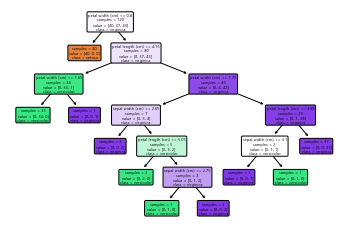

In [22]:
from sklearn.tree import plot_tree

plot_tree(tree,class_names=['setosa', 'versicolor', 'virginica'],feature_names=iris_dataset.feature_names,
         impurity=False, filled=True, rounded=True, fontsize=4)
plt.show()

#### max_depth=3일때

In [34]:
tree1 = DecisionTreeClassifier(max_depth=3, random_state=10)
tree1.fit(X_train, y_train)

print("훈련 세트 정확도: {:.3f}".format(tree.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(tree.score(X_test, y_test))) 

훈련 세트 정확도: 0.967
테스트 세트 정확도: 0.933


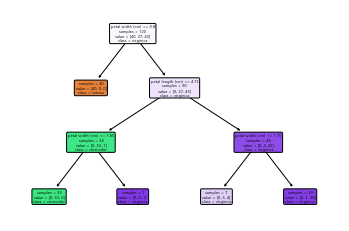

In [35]:
from sklearn.tree import plot_tree

plot_tree(tree1,class_names=['setosa', 'versicolor', 'virginica'],feature_names=iris_dataset.feature_names,
         impurity=False, filled=True, rounded=True, fontsize=4)
plt.show()

* 순수노드 일때보다 max_depth=3일때가 훈련세트, 테스트세트 정확도 모두 떨어진다.

### 2. feature importance를 시각화 하세요.

In [13]:
iris_dataset.data.shape

(150, 4)

In [18]:
iris_dataset

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [37]:
print("특성 중요도 : \n", tree.feature_importances_)

특성 중요도 : 
 [0.         0.         0.40994178 0.59005822]


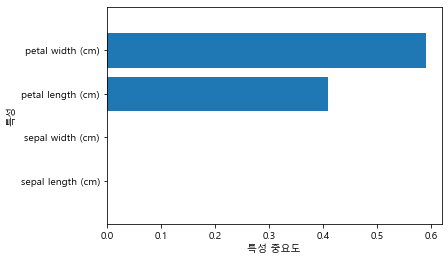

In [38]:
import numpy as np
def plot_feature_importances_iris(model):
    n_features = iris_dataset.data.shape[1]
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), iris_dataset.feature_names)
    plt.xlabel("특성 중요도")
    plt.ylabel("특성")
    plt.ylim(-1, n_features)
    
plot_feature_importances_iris(tree)

sepal length (cm) : 0.000
sepal width (cm) : 0.000
petal length (cm) : 0.410
petal width (cm) : 0.590


<AxesSubplot:>

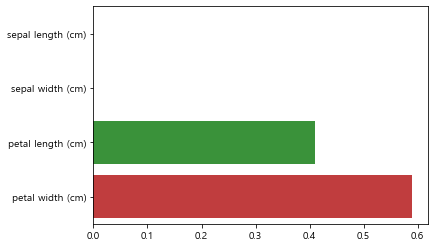

In [39]:
import seaborn as sns
%matplotlib inline

for name, value in zip(iris_dataset.feature_names, tree.feature_importances_):
    print('{0} : {1:.3f}'.format(name,value))

sns.barplot(x = tree.feature_importances_, y = iris_dataset.feature_names)

* DecisionTree모델에서 꽃잎의 너비 특성을 가장 중요하다고 본다.